<a href="https://colab.research.google.com/github/Pablin72/Reconocimiento-Facial/blob/main/ProyectoIA_RGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Configuración**

---

Antes de continuar, vamos a **recopilar e importar todos los módulos** que son **necesarios en el cuaderno**. Esto nos permitirá **trabajar de manera eficiente en todo el cuaderno**.

In [2]:
# Common
import os
import cv2 as cv
import numpy as np
import seaborn as sns
from IPython.display import clear_output as cls
import pandas as pd
import os
import imutils
from PIL import Image

# Data
from tqdm import tqdm
from glob import glob

# Data Visuaalization
import plotly.express as px
import matplotlib.pyplot as plt

# Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2


In [3]:
IMG_W, IMG_H, IMG_C = (150, 150, 3)

In [4]:
# Obtenemos el directorio
root_path = '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos'

# Recolectamos los nombres de las personas
dir_names = os.listdir(root_path)
person_names = [name.split("_")[-1].title() for name in dir_names]
n_individuals = len(person_names)

print(f"Total de individuos: {n_individuals}\n")
print(f"Nombre de los individuos : \n\t{person_names}")

Total de individuos: 7

Nombre de los individuos : 
	['Sergio', 'Pablo', 'Sebastian', 'Anthony', 'Mattew', 'Diego', 'Fernando']


In [5]:
# Cantidad de imagenes por personas
n_images_per_person = [len(os.listdir(root_path + '/' + name)) for name in dir_names]
n_images = sum(n_images_per_person)

# Show
print(f"Total Number of Images : {n_images}.")

Total Number of Images : 6991.


In [6]:
# Plot the Distribution of number of images per person.
fig = px.bar(x=person_names, y=n_images_per_person, color=person_names)
fig.update_layout({'title':{'text':"Fotos por persona"}})
fig.show()

In [7]:
# Select all the file paths : 50 images per person.
filepaths = [path  for name in dir_names for path in glob(root_path + "/" + name + "/*")[:500]]
print(filepaths)
np.random.shuffle(filepaths)
print(f"Total number of images to be loaded : {len(filepaths)}")

# Create space for the images
all_images = np.empty(shape=(len(filepaths), IMG_W, IMG_H, IMG_C), dtype = np.float32)
all_labels = np.empty(shape=(len(filepaths), 1), dtype = np.int32)



['/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sergio/rostro_29.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sergio/rostro_9.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sergio/rostro_40.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sergio/rostro_34.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sergio/rostro_13.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sergio/rostro_37.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sergio/rostro_46.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sergio/rostro_30.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sergio/rostro_18.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sergio/rostro_28.jpg', '/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Sergio/rostro_3.jpg', 

In [10]:
import random

# Crear un arreglo ordenado del 0 al 3499
aleatorios = list(range(0, 3500))

# Desordenar los elementos del arreglo
random.shuffle(aleatorios)

print(aleatorios)

[1114, 2729, 2175, 1542, 1756, 1913, 1801, 800, 2839, 556, 3145, 3168, 207, 377, 329, 583, 1465, 2080, 1127, 82, 1226, 2106, 2709, 1812, 888, 45, 3385, 1098, 2548, 273, 1290, 1834, 1340, 1479, 1699, 2065, 2033, 3328, 532, 1146, 1275, 171, 2038, 3, 1522, 2618, 1063, 1533, 2586, 3163, 2885, 307, 3446, 2353, 1836, 990, 802, 44, 844, 143, 3300, 2683, 118, 1265, 2156, 881, 3042, 1191, 1629, 394, 992, 2506, 1590, 123, 2546, 624, 406, 1943, 151, 3472, 1139, 1769, 1584, 964, 1018, 946, 1211, 2674, 2206, 2791, 3475, 1634, 2502, 1617, 488, 1141, 1857, 1157, 983, 3127, 1718, 2438, 2786, 542, 2371, 2335, 568, 785, 1052, 2996, 1704, 340, 2083, 2409, 2803, 1435, 345, 2122, 449, 324, 130, 2991, 586, 1662, 1257, 360, 730, 1578, 3263, 2953, 1956, 96, 1431, 551, 56, 2732, 412, 837, 3460, 2648, 3374, 700, 1998, 3345, 656, 1301, 3061, 89, 2970, 1223, 2116, 2672, 1353, 1327, 1201, 3078, 1405, 2533, 2026, 1004, 3219, 2292, 1122, 2679, 3303, 1100, 3370, 2170, 2311, 2228, 3188, 486, 3230, 1735, 1296, 1861, 11

In [11]:
#MODIFICAR ESTE CODIGO PARA QUE LAS IMAGENES SE GUARDEN DE MANERA ALEATORIA, IR EN ORDEN CON UN CONTADOR RECORRIENDO UN ARREGLO QUE TIENE LOS NUMEROS
#SIN ORDEN, POR EJEMPLO 23, 6, 98, 123, 3214 ...
# For each path, load the image and apply some preprocessing.

for index, path in tqdm(enumerate(filepaths), desc="Loading Data"):

    # Extract label
    label = [name for name in dir_names if name in path][0]
    label = person_names.index(label.title())

    # Load the Image
    image = plt.imread(path)

    # Convert image stype
    image = image.astype(np.float32)/255.0

    all_images[aleatorios[index]] = image
    all_labels[aleatorios[index]] = label

Loading Data: 3500it [02:29, 23.44it/s]


In [12]:
index

3499

# **Data Visualization**
---

Now that we have **successfully loaded our data set**, we can **proceed to visualize it**. **Visualization** is a **crucial step** in any **data analysis task**, as it helps us **gain insight** into the **data and identify any patterns** or **anomalies that might be present**. In the case of **face recognition**, **visualization allows** us to get a **sense of the quality** of the **images** and how well they **represent each individual**.

In [13]:
#MODIFICAR ESTE CODIGO PARA QUE SOLO RECORRA EL ARREGLO ALEATORIO QUE YA SE CREO
def show_data(
    images: np.ndarray,
    labels: np.ndarray,
    GRID: tuple=(7,4),
    FIGSIZE: tuple=(25,50),
    recog_fn = None,
    database = None
) -> None:

    """
    Function to plot a grid of images with their corresponding labels.

    Args:
        images (numpy.ndarray): Array of images to plot.
        labels (numpy.ndarray): Array of corresponding labels for each image.
        GRID (tuple, optional): Tuple with the number of rows and columns of the plot grid. Defaults to (15,6).
        FIGSIZE (tuple, optional): Tuple with the size of the plot figure. Defaults to (30,50).
        recog_fn (function, optional): Function to perform face recognition. Defaults to None.
        database (dictionary, optional): Dictionary with the encoding of the images for face recognition. Defaults to None.

Returns:
        None
    """

    # Plotting Configuration
    plt.figure(figsize=FIGSIZE)
    n_rows, n_cols = GRID
    n_images = n_rows * n_cols
    contador = 0
    # loop over the images and labels
    for index in range(n_images):

        # Select image in the corresponding label randomly
        image, label = images[index], person_names[int(labels[index])]

        # Create a Subplot
        plt.subplot(n_rows, n_cols, index+1)

        # Plot Image
        plt.imshow(image)
        plt.axis('off')

        if recog_fn is None:
            # Plot title
            plt.title(label)
        else:
            recognized = recog_fn(image, database)
            plt.title(f"True:{label}\nPred:{recognized}")

    # Show final Plot
    plt.tight_layout()
    plt.show()

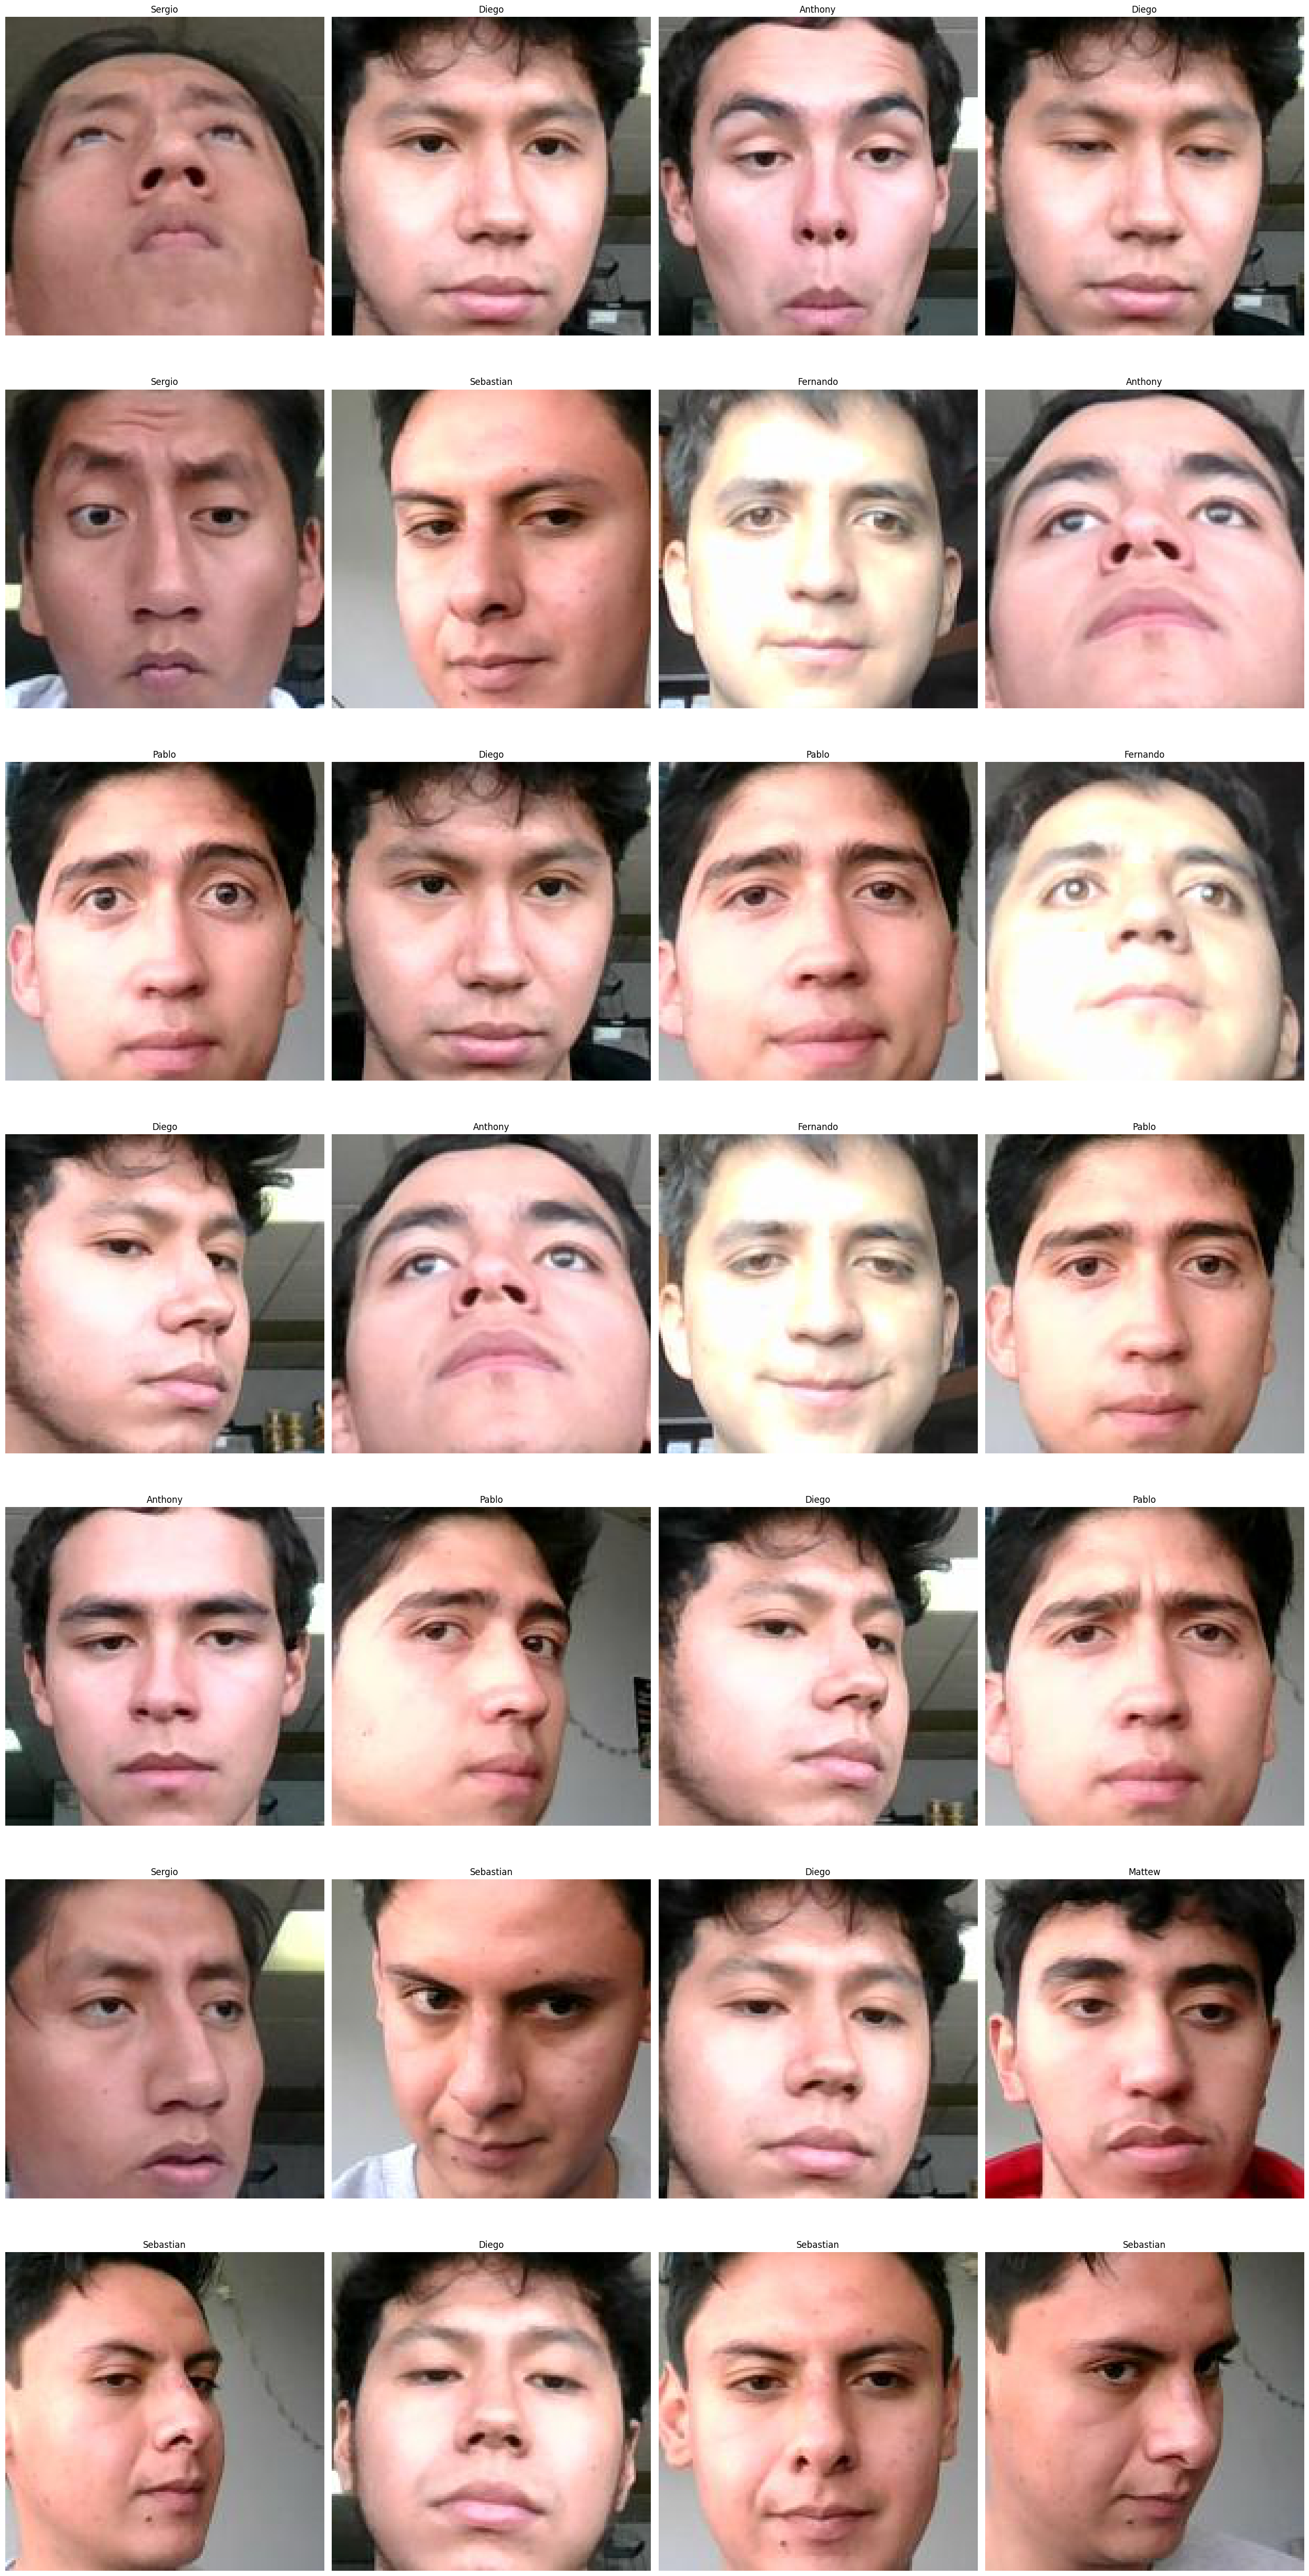

In [14]:
show_data(images = all_images, labels = all_labels)

This **data set** is a **treasure trove of images**, containing a **vast variety of photographs**. The **diversity** of the **images** is **remarkable**, with a **range of lighting conditions, poses, and unique facial features** that **distinguish each individual**. It's fascinating to see how these **well-known figures** are captured in **different moments and situations**. As a **fan of many of these individuals**, it's a **delight to explore** the **collection** and see some of **their candid and posed shots**.

In [31]:
def create_model():
    model = Sequential()
    model.add(Conv2D(200, (3,3), input_shape = (150, 150, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(100, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Conv2D(50, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    model.add(Flatten())

    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(7, activation = 'softmax'))


    return model

In [32]:
X = all_images

###Dummies

In [33]:
# Crear un DataFrame a partir de las etiquetas
y = pd.DataFrame(all_labels, columns=['label'])

# Convertir las etiquetas a variables ficticias (dummies)
y_dummies = pd.get_dummies(y['label'])

In [34]:
train_images, test_images, train_labels, test_labels = train_test_split(X, y_dummies, test_size=0.3, random_state=90)

In [35]:
cnn_model = create_model()

In [36]:
print(cnn_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 200)     5600      
                                                                 
 activation_6 (Activation)   (None, 148, 148, 200)     0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 200)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 100)       180100    
                                                                 
 activation_7 (Activation)   (None, 72, 72, 100)       0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 100)      0         
 2D)                                                  

In [37]:
cnn_model.compile(optimizer= 'adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [38]:
cnn_model.fit(x= train_images, y = train_labels, validation_data = (test_images, test_labels),
             batch_size=80, epochs=50, verbose = 1)

Epoch 1/50
31/31 [==============================] - 18s 332ms/step - loss: 1.9529 - accuracy: 0.1380 - val_loss: 1.9467 - val_accuracy: 0.1229
Epoch 2/50
31/31 [==============================] - 6s 202ms/step - loss: 1.9461 - accuracy: 0.1478 - val_loss: 1.9424 - val_accuracy: 0.1419
Epoch 3/50
31/31 [==============================] - 7s 217ms/step - loss: 1.9301 - accuracy: 0.1771 - val_loss: 1.8095 - val_accuracy: 0.3324
Epoch 4/50
31/31 [==============================] - 6s 200ms/step - loss: 1.6827 - accuracy: 0.2902 - val_loss: 1.1323 - val_accuracy: 0.5219
Epoch 5/50
31/31 [==============================] - 6s 197ms/step - loss: 1.2702 - accuracy: 0.4743 - val_loss: 0.8581 - val_accuracy: 0.7019
Epoch 6/50
31/31 [==============================] - 7s 221ms/step - loss: 1.0160 - accuracy: 0.6122 - val_loss: 0.7637 - val_accuracy: 0.7019
Epoch 7/50
31/31 [==============================] - 7s 217ms/step - loss: 0.9444 - accuracy: 0.6584 - val_loss: 0.7424 - val_accuracy: 0.6981
Epoch

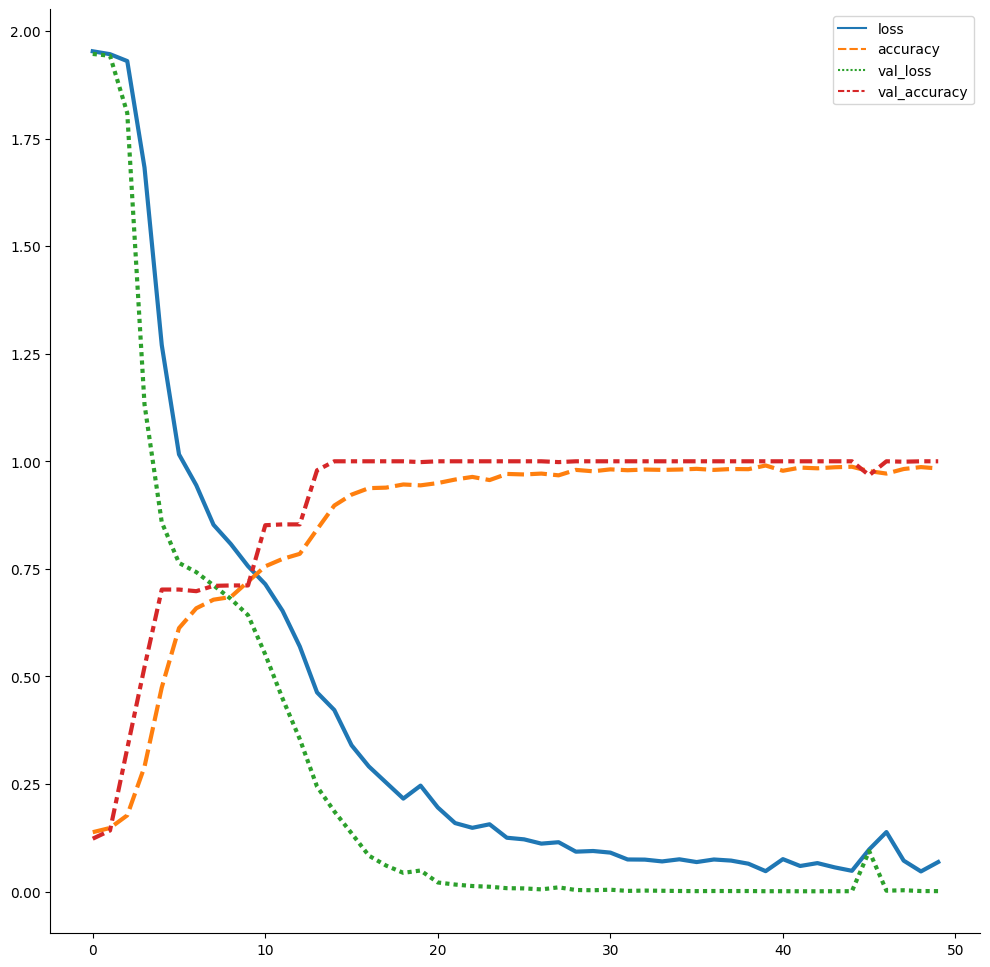

In [39]:
loss = pd.DataFrame(cnn_model.history.history)
plt.figure(figsize = (12, 12))
sns.lineplot(data = loss, lw = 3)
sns.despine()

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

# Obtener las predicciones para los conjuntos de entrenamiento y prueba
train_predictions = cnn_model.predict(train_images)
test_predictions = cnn_model.predict(test_images)

# Obtener las clases predichas
train_pred_classes = np.argmax(train_predictions, axis=1)
test_pred_classes = np.argmax(test_predictions, axis=1)

# Obtener las clases verdaderas
train_true_classes = np.argmax(train_labels.values, axis=1)
test_true_classes = np.argmax(test_labels.values, axis=1)

# Generar la matriz de confusión y el informe de clasificación para el conjunto de entrenamiento
train_confusion_matrix = confusion_matrix(train_true_classes, train_pred_classes)
train_classification_report = classification_report(train_true_classes, train_pred_classes)

# Generar la matriz de confusión y el informe de clasificación para el conjunto de prueba
test_confusion_matrix = confusion_matrix(test_true_classes, test_pred_classes)
test_classification_report = classification_report(test_true_classes, test_pred_classes)

# Imprimir la matriz de confusión y el informe de clasificación para el conjunto de entrenamiento
print("Train Confusion Matrix:")
print(train_confusion_matrix)
print("\nTrain Classification Report:")
print(train_classification_report)

# Imprimir la matriz de confusión y el informe de clasificación para el conjunto de prueba
print("Test Confusion Matrix:")
print(test_confusion_matrix)
print("\nTest Classification Report:")
print(test_classification_report)


33/33 [==============================] - 1s 42ms/step
Train Confusion Matrix:
[[371   0   0   0   0   0   0]
 [  0 332   0   0   0   0   0]
 [  0   0 354   0   0   0   0]
 [  0   0   0 346   0   0   0]
 [  0   0   0   0 362   0   0]
 [  0   0   0   0   0 334   0]
 [  0   0   0   0   0   0 351]]

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       371
           1       1.00      1.00      1.00       332
           2       1.00      1.00      1.00       354
           3       1.00      1.00      1.00       346
           4       1.00      1.00      1.00       362
           5       1.00      1.00      1.00       334
           6       1.00      1.00      1.00       351

    accuracy                           1.00      2450
   macro avg       1.00      1.00      1.00      2450
weighted avg       1.00      1.00      1.00      2450

Test Confusion Matrix:
[[129   0   0   0   0   0   0]
 [  0 168   0   0   0  

In [41]:
from PIL import Image

def identify_person(image_path, model):
    # Load and preprocess the image
    img = Image.open(image_path)
    img = img.resize((150, 150))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    # Make predictions with the model
    predictions = model.predict(img)
    predicted_label = np.argmax(predictions)

    return predicted_label

In [ ]:
predice = identify_person("/content/drive/MyDrive/Colab Notebooks/Reconocimiento Facial/Fotos/Anthony/rostro_100.jpg", cnn_model)

In [ ]:
person_names[predice]

In [44]:
cnn_model.save('modeloCNNv3.h5')